In [1]:
from IPython.display import SVG
import Inflow, one , os

In [2]:
from ResearchProjects import adaptation
from ResearchProjects.adaptation import aliases as alias

In [3]:
connector = one.ONE(data_access_mode = 'remote')
sessions = connector.search( qc = "PASS", project = "Adaptation" , details = True)

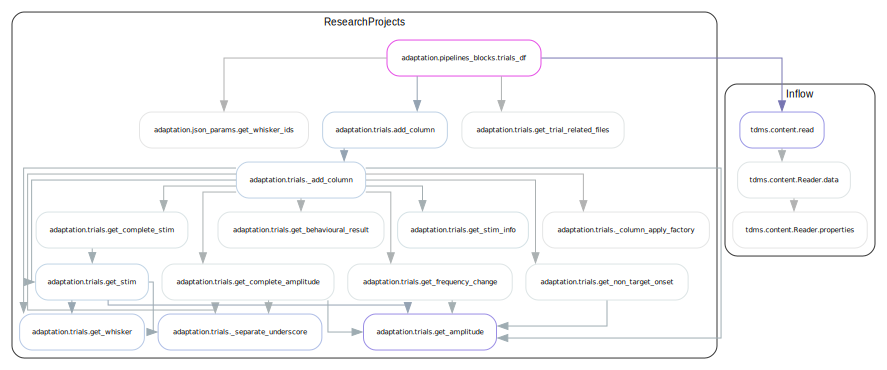

In [5]:
filepath = os.path.abspath('trials_df.svg')
if os.path.isfile(filepath):
    os.remove(filepath)

with Inflow.plots.graphviz.PyCallGraphContext(output_file = filepath , 
                                              graph_supp_attr = {"rankdir": "TB", "label" : "", "splines":"ortho"}, 
                                              subgraph_supp_attr = {"style": "rounded"}) as test :
    adaptation.pipelines.trials_df(session_details = sessions.iloc[0])

display(SVG(filepath))

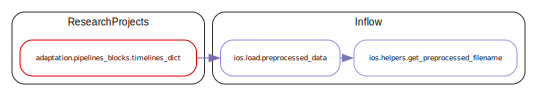

In [8]:
filepath = os.path.abspath('timelines_dict.svg')
if os.path.isfile(filepath):
    os.remove(filepath)

with Inflow.plots.graphviz.PyCallGraphContext(output_file = filepath, 
                                              graph_supp_attr = {"rankdir": "LR","label" : "", "splines":"ortho"}, 
                                              subgraph_supp_attr = {"style": "rounded"}) as test :
    adaptation.pipelines.timelines_dict(session_details = sessions.iloc[0], n_jobs = 30)
    
display(SVG(filepath))

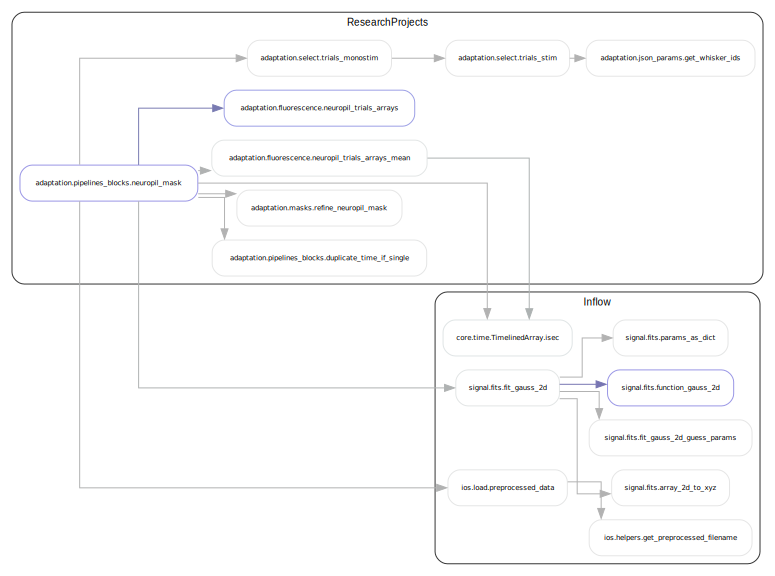

In [4]:
filepath = os.path.abspath('neuropil_mask.svg')
if os.path.isfile(filepath):
    os.remove(filepath)

with Inflow.plots.graphviz.PyCallGraphContext(output_file = filepath , 
                                              graph_supp_attr = {"rankdir": "LR", "label" : "", "splines":"ortho"}, 
                                              subgraph_supp_attr = {"style": "rounded"},
                                              exclude = [ "*core.time.TA_*" , "*core.time.TimelinedArray._*" ] ) as test :
    adaptation.pipelines.neuropil_mask(session_details = sessions.iloc[0],
                                          extra = "C1",
                                          do_plots = False,
                                          save_plots = False,
                                          maxfev = 5000,
                                          averaging_time_duration =  [0.2,0.2],
                                          averaging_time_offset = [-0.6,0.8],
                                          sigma = 6,
                                          variation_measurement = "delta_over_f",
                                          n_jobs = 30,
                                          target_stim = alias.pw10_90)

display(SVG(filepath))